# Challenge Set 2
## Topic:        Pandas  
## Date:         04/25/2016  
## Name:         David Kanarek  

In [3]:
import requests

url = 'http://www.boxofficemojo.com/yearly/chart/?page=1&view=releasedate&view2=domestic&yr=2013&p=.htm'

response = requests.get(url)

response.status_code

200

In [4]:
from bs4 import BeautifulSoup

page = response.text

soup = BeautifulSoup(page)

#for i in soup.find_all('a'):
 #   print i

url_start = url[:28]
movie_links = []
for links in soup.find_all('a'):
    try:
        s = str(links['href'])
        if s[1:7] == 'movies' and s[8:11] == '?id':
            movie_links.append(url_start+s)   
    except KeyError:
        pass
    
junk = movie_links.pop(0)


/home/dkanarek/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [5]:
import pandas as pd
import numpy as np

columns = ['Title','Release_Date','Runtime_min','Rating', 'Gross_Earnings','Director']
index = range(1,101)
movie_info = pd.DataFrame(index = index, columns = columns)


c = ['Title']
for i in range(1,13):
    c.append('Week '+ str(i))

Week 1


In [7]:
response = requests.get(movie_links[99])

page = response.text

soup = BeautifulSoup(page)

response.status_code

200

In [8]:
import re

def find_title(soup):
    return soup.find('title').text.split('(')[0].strip()

def find_dom_total(soup):
    domestic_total_regex = re.compile('Domestic')
    soup.find(text=domestic_total_regex)
    dtg_string = soup.find(text=re.compile('Domestic Total'))
    dtg = dtg_string.findNextSibling().text
    dtg = dtg.replace('$','').replace(',','')
    domestic_total_gross = int(dtg)
    return domestic_total_gross

def get_movie_value(soup, field_name):
    '''Grab a value from boxofficemojo HTML
    
    Takes a string attribute of a movie on the page and
    returns the string in the next sibling object
    (the value for that attribute)
    or None if nothing is found.
    '''
    obj = soup.find(text=re.compile(field_name))
    if not obj: 
        return None
    # this works for most of the values
    next_sibling = obj.findNextSibling()
    if next_sibling:
        return next_sibling.text 
    else:
        return None
    


In [9]:
import dateutil.parser

def to_date(datestring):
    date = dateutil.parser.parse(datestring)
    return date

def money_to_int(moneystring):
    moneystring = moneystring.replace('$', '').replace(',', '')
    return int(moneystring)

def runtime_to_minutes(runtimestring):
    runtime = runtimestring.split()
    try:
        minutes = int(runtime[0])*60 + int(runtime[2])
        return minutes
    except:
        return None
    

domestic_total = find_dom_total(soup)    
runtime = runtime_to_minutes(get_movie_value(soup,'Runtime'))
rating = get_movie_value(soup,'MPAA Rating')
release_date = to_date(get_movie_value(soup,'Release Date'))

def get_weekly_url(soup):
    a = soup.find('ul', class_="nav_tabs").find_all('a')
    string = 'weekly'
    weekly_url =''
    for i in a:
        if str(i['href']).find(string) >= 0:
            weekly_url = url_start+str(i['href'])
    return weekly_url

weekly_url = get_weekly_url(soup)

def get_director(soup):
    a = soup.find('td',valign="top", align="right")
    try:
        return a.findNextSibling().text.strip()
    except:
        return None
director = get_director(soup)

title = find_title(soup)

print title, domestic_total, runtime, rating, director, release_date

Her 25568251 120 R Spike Jonze 2013-12-18 00:00:00


In [10]:
response = requests.get(weekly_url)

page = response.text

soup = BeautifulSoup(page)

response.status_code

200

In [11]:
def get_weekly_gross(soup):
    s = soup.find_all('td',align = 'right')
    count = 0
    weekly_gross = []
    for i in s[2:]:
        if count%6==0:
            weekly_gross.append(i.text)
        count += 1
    return weekly_gross

def get_soup(url):
    response = requests.get(url)
    page = response.text
    #print response.status_code
    return BeautifulSoup(page)

In [12]:
#columns = ['Title','Release_Date','Runtime_min','Rating', 'Gross_Earnings','Director']

count = 1
for i in movie_links:
    soup = get_soup(i)
    movie_info.set_value(count,'Gross_Earnings', find_dom_total(soup))    
    movie_info.set_value(count,'Runtime_min', runtime_to_minutes(get_movie_value(soup,'Runtime')))
    movie_info.set_value(count,'Rating', get_movie_value(soup,'MPAA Rating'))
    movie_info.set_value(count,'Release_Date', to_date(get_movie_value(soup,'Release Date')))
    movie_info.set_value(count,'Director',get_director(soup))
    movie_info.set_value(count,'Title',find_title(soup))
    
    weekly_gross.set_value(count,'Title', find_title(soup))
    weekly_url = get_weekly_url(soup)
    soup = get_soup(weekly_url)
    weekly = get_weekly_gross(soup)
    #for j in range(weekly_gross.columns[1:]):
     #   weekly_gross.set_value(count,weekly_gross.columns[j],weekly[i])
    
    
    count += 1


In [45]:
import pickle

with open('movie_info.pkl', 'w') as picklefile:
    pickle.dump(movie_info, picklefile)

In [64]:
import pickle


with open('movie_info.pkl', 'r') as picklefile:
    movie_info = pickle.load(picklefile)

### Challenge 1

/home/dkanarek/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


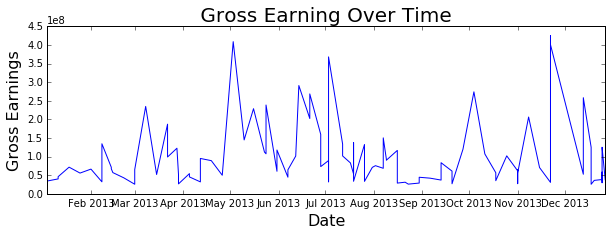

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
time_sorted = movie_info.sort(['Release_Date'], ascending =[1])

plt.figure(figsize=(10,3))
plt.plot(time_sorted['Release_Date'],time_sorted['Gross_Earnings'])
plt.title(' Gross Earning Over Time ', fontsize = 20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Gross Earnings', fontsize=16)
plt.show()

### Challenge 2

/home/dkanarek/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


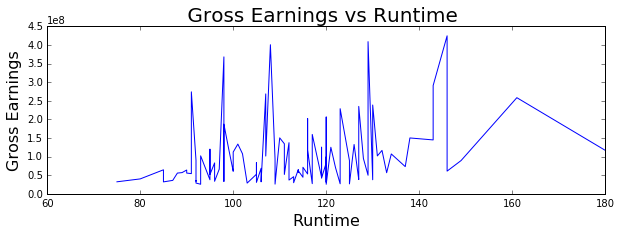

In [47]:
runtime_sorted = movie_info.sort(['Runtime_min'], ascending =[1])

plt.figure(figsize=(10,3))
plt.plot(runtime_sorted['Runtime_min'],runtime_sorted['Gross_Earnings'])
plt.title(' Gross Earnings vs Runtime  ', fontsize = 20)
plt.xlabel('Runtime', fontsize=16)
plt.ylabel('Gross Earnings', fontsize=16)
plt.show()

### Challenge 3

In [66]:
import numpy as np

movie_info[['Gross_Earnings','Runtime_min']] = movie_info[['Gross_Earnings','Runtime_min']].astype(float)

df = movie_info.groupby(['Rating'])[['Gross_Earnings','Runtime_min']].mean()

movie_info[movie_info['Rating']=='G'].size

df.head()

,Gross_Earnings,Runtime_min
Rating,,
G,2.684928e+08,107.000000
PG,1.311357e+08,99.933333
PG-13,1.114498e+08,117.510638
R,6.989243e+07,110.729730


### Challenge 4

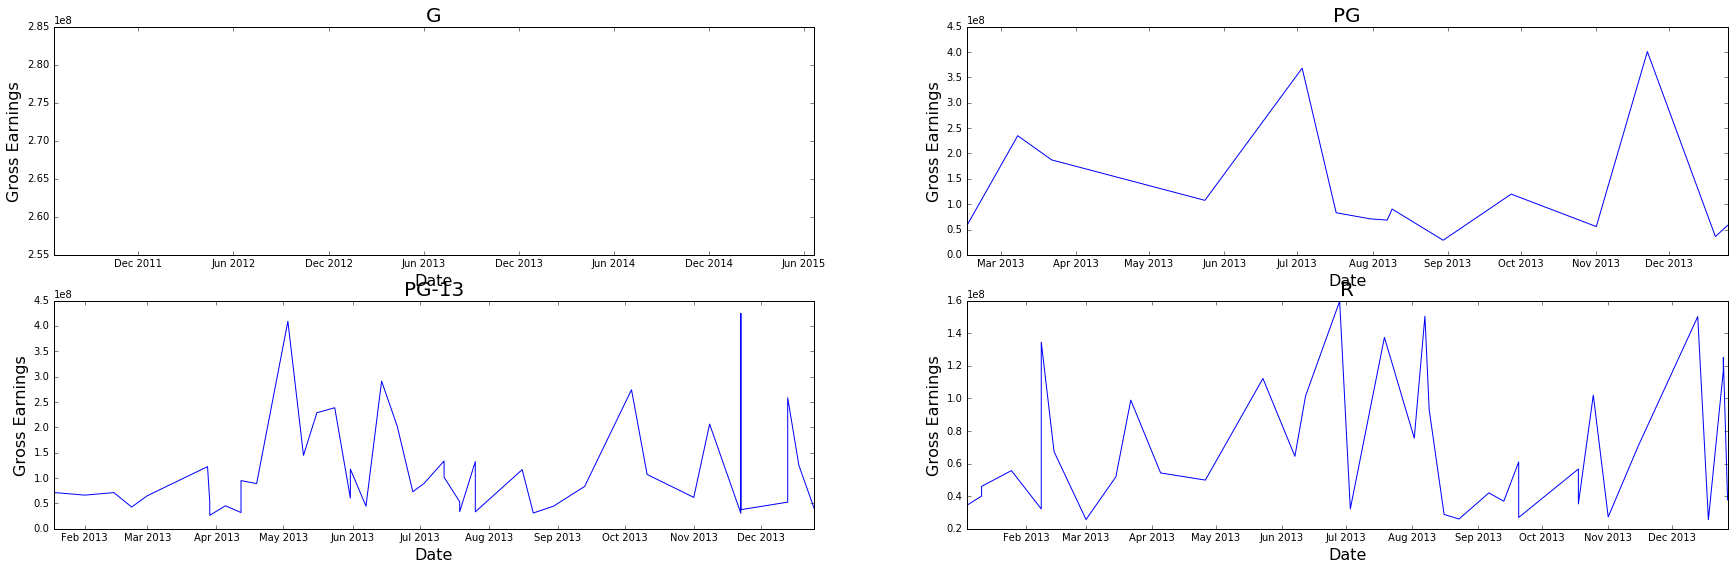

In [132]:
subplots = time_sorted.groupby(['Rating'])[['Gross_Earnings','Release_Date']]
    
plt.figure(figsize=(30,9))

count = 1
for name, group in subplots: 
    plt.subplot(2,2,count)
    plt.plot(group['Release_Date'],group['Gross_Earnings'])
    plt.title(name, fontsize = 20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Gross Earnings', fontsize=16)
    count +=1

subplots

### Challenge 5

In [71]:
df = movie_info.groupby(['Director'])[['Gross_Earnings']].mean().sort(['Gross_Earnings'], ascending =[0])

df.head(1)

/home/dkanarek/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Gross_Earnings
Director,
Francis Lawrence,424668047


In [112]:
import datetime as dt

movie_info['Release_Date']= pd.to_datetime(movie_info['Release_Date'])
movie_info['Month'] = movie_info['Release_Date'].map(lambda x: x.month)
df = movie_info.groupby(['Month'])[['Gross_Earnings']].mean().reset_index()
df['Count'] = movie_info.groupby(['Month'])[['Gross_Earnings']].count().reset_index()['Gross_Earnings']
df['St_Dev'] = movie_info.groupby(['Month'])[['Gross_Earnings']].std().reset_index()['Gross_Earnings']
df['St_Error'] = df['St_Dev']/(df['Count']**(.5))

,Month,Gross_Earnings,Count,St_Dev,St_Error
0,1,4.954324e+07,5,1.465947e+07,6555914.034601
1,2,6.738601e+07,7,3.283185e+07,12409272.366783
2,3,9.609710e+07,9,7.323942e+07,24413138.904748
3,4,6.094072e+07,6,2.530104e+07,10329105.790812
4,5,1.774097e+08,8,1.117754e+08,39518588.373287


### Challenge 6

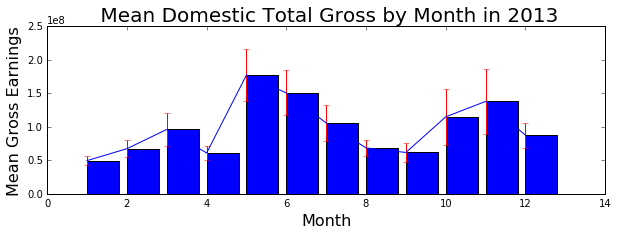

In [115]:
plt.figure(figsize=(10,3))
errors = df['St_Error']
x = df['Month']
y = df['Gross_Earnings']
plt.bar(x,y)
plt.title(' Mean Domestic Total Gross by Month in 2013', fontsize = 20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Mean Gross Earnings', fontsize=16)
plt.errorbar(x, y, xerr=0, yerr=errors, ecolor = 'r')
plt.show()